In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv(r'iris.txt')
df.head()

df = df.iloc[:,:-1]
df.dtypes

5.1    float64
3.5    float64
1.4    float64
0.2    float64
dtype: object

In [3]:
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = feature_scaler.fit_transform(df)
df_scaled = pd.DataFrame(data=df_scaled)
df_scaled.head()

,0,1,2,3
0,0.166667,0.416667,0.067797,0.041667
1,0.083333,0.458333,0.084746,0.041667
2,0.194444,0.666667,0.067797,0.041667
3,0.083333,0.583333,0.067797,0.083333
4,0.194444,0.583333,0.084746,0.041667


In [ ]:
# Define parameters for SOM network

In [4]:
som_width = 10
som_length = 10
epochs = 15000
initial_learning_rate=0.01
np.random.seed(8)

In [5]:
raws,cols = df_scaled.shape
print("Data set raw count=%d column count=%d" %(raws, cols))

Data set raw count=149 column count=4


In [6]:
initial_radius = max(som_width, som_length)/2
time_constant =  epochs/np.log(initial_radius)

In [7]:
som_net = np.random.random((som_width, som_length, cols))
print("Initial weights set to SOM network:")
print(som_net)

Initial weights set to SOM network:
[[[8.73429403e-01 9.68540663e-01 8.69194540e-01 5.30855692e-01]
  [2.32728328e-01 1.13988043e-02 4.30468818e-01 4.02351360e-01]
  [5.22674671e-01 4.78391796e-01 5.55356474e-01 5.43386018e-01]
  [7.60895576e-01 7.12374574e-01 6.19682096e-01 4.26091770e-01]
  [2.89075028e-01 9.73855241e-01 3.33774046e-01 2.18801061e-01]
  [6.58083878e-02 9.82870547e-01 1.27855713e-01 3.22130793e-01]
  [7.09428448e-02 2.24769939e-01 3.93634915e-01 8.96145005e-01]
  [3.45461612e-01 9.84749437e-01 2.87320490e-02 3.51684736e-01]
  [3.80958889e-01 7.64160131e-01 9.38803913e-01 3.19689796e-01]
  [4.32475933e-01 2.70145742e-01 8.01055886e-01 6.38238806e-01]]

 [[6.86901335e-02 6.03644476e-01 7.95574558e-01 3.20081564e-02]
  [4.55447822e-01 7.90172541e-01 9.88596518e-01 5.83964544e-01]
  [3.89122976e-02 4.46422908e-01 1.88172515e-01 6.27055647e-01]
  [2.15317799e-01 1.50970108e-01 5.36144307e-01 1.00386794e-01]
  [7.31158432e-01 9.39651039e-01 9.43318184e-01 3.74738505e-01]
  

In [ ]:
#define basic functions

In [8]:
def update_radius(initial_radius, i, time_constant):
    return initial_radius * np.exp(-i / time_constant)

def update_learning_rate(initial_learning_rate, i, n_iterations):
    return initial_learning_rate * np.exp(-i / n_iterations)

def calculate_euclidian_dis(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [ ]:
#Logic to calculcate best matching unit

In [9]:
def find_best_matching_Unit(data_point):
    bmu_pos = np.array([0, 0])
    min_dist = np.iinfo(np.int).max
    input_dim = len(data_point)
    
    for x in range(som_width):
        for y in range(som_length):
            som_weight_vector = som_net[x, y, :].reshape(1, 4)
            euclidian_dist = calculate_euclidian_dis(som_weight_vector, data_point)
            if euclidian_dist < min_dist:
                min_dist = euclidian_dist
                bmu_pos = np.array([x, y])
    
    bmu = som_net[bmu_pos[0], bmu_pos[1], :].reshape(1, 4)
    return (bmu, bmu_pos)

In [ ]:
#Neighbourhood function to calculate influence from best matching unit and selected node

In [10]:
def neighbourhood_function(bmu_location, selected_node_location, radius):
    euclidien_dist_to_bmu = calculate_euclidian_dis(bmu_location, selected_node_location)
    return np.exp(-euclidien_dist_to_bmu / (2* (radius**2)))

In [ ]:
#Train SOM network with Iris data set

In [11]:
#shuffle data set
df_scaled = df_scaled.sample(frac=1)

rad_values = list()
learn_rates_values = list()
rad_values.append(initial_radius)
learn_rates_values.append(initial_learning_rate)

for i in range(epochs):
    data_point = np.array(df_scaled.sample())
    bmu, bmu_idx = find_best_matching_Unit(data_point)

    r_new = update_radius(initial_radius, i, time_constant)
    new_learning_rate = update_learning_rate(initial_learning_rate, i, epochs)
    
    rad_values.append(r_new)
    learn_rates_values.append(new_learning_rate)
    
    for x in range(som_width):
        for y in range(som_length):
            w = som_net[x, y, :].reshape(1, 4)
            w_dist = calculate_euclidian_dis(np.array([x, y]), bmu_idx)
            
            if w_dist <= r_new:
                influence = neighbourhood_function(bmu, w, r_new)
                new_w = w + (new_learning_rate * influence * (data_point - w))
                som_net[x, y, :] = new_w.reshape(1, 4)

Text(0.5, 1.0, 'Radius values')

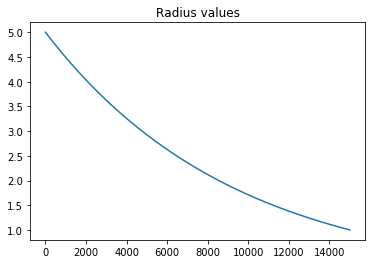

In [12]:
from matplotlib import pyplot as plt
plt.plot(rad_values)
plt.title('Radius values')

Text(0.5, 1.0, 'Learning Rates values')

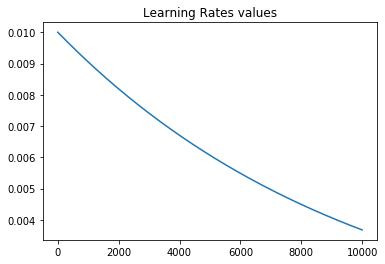

In [14]:
plt.plot(learn_rates_values)
plt.title('Learning Rates values')

In [ ]:
#Visualize the weights of the SOM after number of epoch times

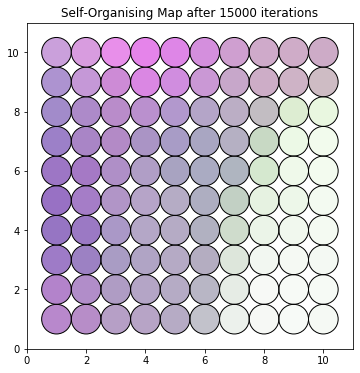

In [13]:
from matplotlib import patches as patches

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1, aspect='equal')
ax.set_xlim((0, som_width+1))
ax.set_ylim((0, som_length+1))
ax.set_title('Self-Organising Map after %d iterations' % epochs)

for x in range(1, som_width + 1):
    for y in range(1, som_length + 1):
        ax.add_patch(patches.Circle((x, y), 0.5, facecolor=som_net[x-1,y-1,:], edgecolor='black'))
plt.show()

fig.savefig('SOM_iris_data.png')

In [ ]:
#U Matrix Calculation from above SOM

In [14]:
u_matrix = np.zeros((som_width-1, som_length-1))

for x in range(1, som_width):
    for y in range(1, som_length):
        neighbour_list = list()
        print("-"* 100)
        print("neighbour cordinates of x=%d, y=%d" %(x,y))
        for u in range(x-1, x+2):
            if (u < 0 or u > (som_width-1)):
                continue
            for v in range(y-1, y+2):
                if(v < 0 or v > (som_length-1)):
                    continue
                if (u == x and v == y):
                    continue
                neighbour_list.append(np.array([u,v]))
                print(u,v)
        sum=0
        for idx in neighbour_list:
            sum += calculate_euclidian_dis(som_net[x,y,:], som_net[idx[0],idx[1],:])
        
        avg = sum/len(neighbour_list)
        print("Sum of distance to neighbour weights=%f, average=%f" % (sum, avg))     
        u_matrix[x-1,y-1] = avg

----------------------------------------------------------------------------------------------------
neighbour cordinates of x=1, y=1
0 0
0 1
0 2
1 0
1 2
2 0
2 1
2 2
Sum of distance to neighbour weights=0.987426, average=0.123428
----------------------------------------------------------------------------------------------------
neighbour cordinates of x=1, y=2
0 1
0 2
0 3
1 1
1 3
2 1
2 2
2 3
Sum of distance to neighbour weights=1.072825, average=0.134103
----------------------------------------------------------------------------------------------------
neighbour cordinates of x=1, y=3
0 2
0 3
0 4
1 2
1 4
2 2
2 3
2 4
Sum of distance to neighbour weights=0.885740, average=0.110718
----------------------------------------------------------------------------------------------------
neighbour cordinates of x=1, y=4
0 3
0 4
0 5
1 3
1 5
2 3
2 4
2 5
Sum of distance to neighbour weights=0.886094, average=0.110762
--------------------------------------------------------------------------------

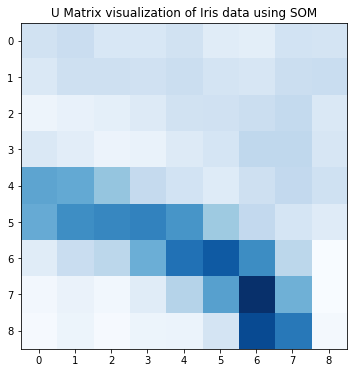

In [15]:
fig = plt.figure(figsize=(6,6))
plt.title("U Matrix visualization of Iris data using SOM")
plt.imshow(u_matrix, cmap="Blues")
plt.show()
fig.savefig('U_Matrix_iris.png')